# Wisconsin Breast Cancer Data Analysis 
The Wisconsin breast data contains features to help us classify a tumor as benign or malignant. We will use various classifiers to try and solve this classification task, specificially a voting classifier consisted of LogisticRegression and KNN, and a bagging and boosting method. Let's do a quick inspection of the data first.  

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

cancer = load_breast_cancer() 
data = pd.DataFrame(cancer.data,columns=cancer.feature_names) 
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [3]:
# the labels 
cancer.target[:20]
list(cancer.target_names)

['malignant', 'benign']

### Soft Voting Classifier
We first try a soft voting classifier which consists of an ensemble of Logistic Regression and KNN. 

In [9]:
lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors = 8) 
vote_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)],voting='soft') 
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
vote_clf.fit(X_train,Y_train) 
prediction = vote_clf.predict(X_test) 
print("Voting classifier accuracy = {}".format(accuracy_score(Y_test,prediction)))

# get individual accuracy score of the ensemble 
classifiers = [lr_clf,knn_clf] 
for classifier in classifiers: 
    classifier.fit(X_train,Y_train) 
    prediction = classifier.predict(X_test) 
    class_name = classifier.__class__.__name__ 
    print("{} accuracy: {}".format(class_name,accuracy_score(Y_test,prediction)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Voting classifier accuracy = 0.9649122807017544
LogisticRegression accuracy: 0.956140350877193
KNeighborsClassifier accuracy: 0.956140350877193


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The voting classifier has the highest classification accuracy of 96.49%. Logistic Regression and KNeighborsClassifier both seem to have high accuracy too at 95.61%. In general, we expect an ensemble voting system to perform slightly better. 

### Random Forest 
Random Forest is formed by many decision trees. Each decision tree is trained on a bootstrapped samples of data (data sampled with replacement). We then aggregate the results from these trees and conduct soft voting. So Random Forests is similar to voting, but it is consisted only of the same model trained on bootstrapped data. 

In [25]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,Y_train) 
prediction = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test,prediction) 
print("Random Forest Accuracy = {}".format(accuracy))

Random Forest Accuracy = 0.9649122807017544


We get a 96.49% accuracy for Random Forest. Let's see if a bit of tuning of the hyperparameters will increase the accuracy. This might take a bit of time, but this is expected when tuning tree models. 

In [24]:
from sklearn.model_selection import GridSearchCV 
params = {
    'n_estimators':[1000],
    'max_depth':[6,8,10,12], 
    'min_samples_leaf':[6,8,10,12],
    'min_samples_split':[8,16,24] 
}
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1) # optimization 
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1) 
grid_cv.fit(X_train,Y_train)
print("Best hyper parameter:\n",grid_cv.best_params_) 
print("Best accuracy:{}".format(grid_cv.best_score_))


Best hyper parameter:
 {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 1000}
Best accuracy:0.9384419197774171


In [31]:
rf_pred = grid_cv.best_estimator_.predict(X_test) 
rf_accuracy = accuracy_score(Y_test,rf_pred) 
print("Tuned Accuracy = {}".format(rf_accuracy))

Tuned Accuracy = 0.9649122807017544


It appears that tuning failed to improve the performance of random forest. This happens quite frequently with tree models - hyperparameter tuning takes a long time, but it does not necessarily guarantee better results. 

### XGBoost 
XGBoost is an extreme Gradient Boost. Gradient boost is an algorithm that fits many weak learners (in our case decision tree) and learns on the errors each weak learner makes to improve upon prediction. It is similar to ada boost (that applies weights to wrong classifications), but it uses gradient descent to learn on the errors made by previous classifiers (specifically to minimize the loss function h(x) = Y-F(x)). XGBoost is a GBM based algorithm that is much faster than GBM and has regularization features and does cross-validation by itself for every iteration. It is also not affected by missing values in the dataset as it can take care of NA values by itself. 

We need to create a DMatrix to train an XGBoost model. 

In [2]:
dataset = load_breast_cancer() 
X_features = dataset.data 
Y_labels = dataset.target 
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [12]:
import xgboost as xgb 
from xgboost import plot_importance 
dtrain = xgb.DMatrix(data=X_train,label=Y_train) 
dtest = xgb.DMatrix(data=X_test,label=Y_test) 
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic', 
    'eval_metric':'logloss', 
    'early_stoppings':100 
}
num_rounds=400

In [13]:
wlist = [(dtrain,'train'),(dtest,'eval')] 
xgb_model = xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds,evals=wlist) 

[21:10:13] WARNING: /private/var/folders/l_/x3gwqsm11lbdmstchpr12rt40000gn/T/pip-install-j8lmk3ye/xgboost/xgboost/src/learner.cc:328: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	tra

[161]	train-logloss:0.00726	eval-logloss:0.08801
[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:

[329]	train-logloss:0.00534	eval-logloss:0.08582
[330]	train-logloss:0.00533	eval-logloss:0.08587
[331]	train-logloss:0.00532	eval-logloss:0.08589
[332]	train-logloss:0.00532	eval-logloss:0.08592
[333]	train-logloss:0.00531	eval-logloss:0.08584
[334]	train-logloss:0.00531	eval-logloss:0.08574
[335]	train-logloss:0.00530	eval-logloss:0.08582
[336]	train-logloss:0.00529	eval-logloss:0.08589
[337]	train-logloss:0.00529	eval-logloss:0.08594
[338]	train-logloss:0.00528	eval-logloss:0.08583
[339]	train-logloss:0.00528	eval-logloss:0.08591
[340]	train-logloss:0.00527	eval-logloss:0.08583
[341]	train-logloss:0.00526	eval-logloss:0.08573
[342]	train-logloss:0.00526	eval-logloss:0.08568
[343]	train-logloss:0.00525	eval-logloss:0.08572
[344]	train-logloss:0.00525	eval-logloss:0.08580
[345]	train-logloss:0.00524	eval-logloss:0.08582
[346]	train-logloss:0.00524	eval-logloss:0.08571
[347]	train-logloss:0.00523	eval-logloss:0.08579
[348]	train-logloss:0.00523	eval-logloss:0.08583
[349]	train-logloss:

Note that we listed the evaluation dataset for early stopping. Also we (generally) see a decreasing loss for each iteration. Let's try and make a prediction on our test dataset. 

In [14]:
pred_probs = xgb_model.predict(dtest) 
print(np.round(pred_probs[:10],3)) 

[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]


In [15]:
preds = [1 if x > 0.5  else 0 for x in pred_probs]  
print(preds[:10])

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# define a function that prints various evaluation metrics  
def get_clf_eval(y_test,pred): 
    confusion = confusion_matrix(y_test,pred) 
    accuracy = accuracy_score(y_test,pred) 
    precision = precision_score(y_test,pred) 
    recall = recall_score(y_test,pred)  
    f1 = f1_score(y_test,pred) 
    print("confusion") 
    print("Accuracy:{}, Precision:{}, Recall:{}, F1:{}".format(accuracy,precision,recall,f1))

get_clf_eval(Y_test,preds)

confusion
Accuracy:0.9736842105263158, Precision:0.9743589743589743, Recall:0.987012987012987, F1:0.9806451612903225


We see a very high score for all the metrics. We can also visualize the importance of the features. 

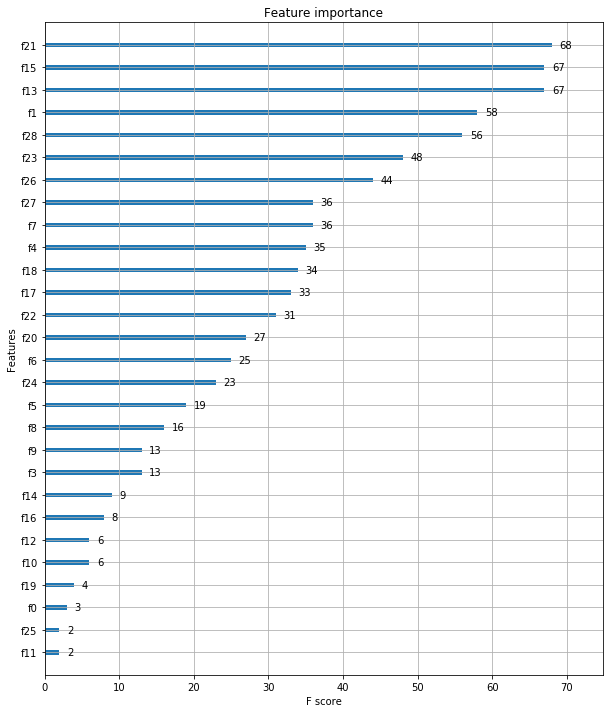

In [11]:
from xgboost import plot_importance 
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(figsize=(10,12)) 
plot_importance(xgb_model,ax=ax) 

The 21st feature (or the worst radius) appears to be the most significant feature. Although the result on the test set looks impressive, we could further tune our hyperparameters for XGBoost by using the function xgboost.cv().  

### LightGBM 
A final model we will try to analyze the data is LightGBM, which is a "lighter" version of XGBoost. It tends to be faster and also requires less memory for training compared to XGBoost. LightGBM uses a leaf-wise division to form decision trees which does not necessarily create a balanced tree, but may minimize the loss of the model. Also, because of the this, the decisions trees being formed tend to be much deeper. 

In [17]:
from lightgbm import LGBMClassifier 
features = cancer.data 
target = cancer.target

X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=156) 
lgbm = LGBMClassifier(n_estimators=100) 
evals = [(X_test,Y_test)]  
lgbm.fit(X_train,Y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True) 



[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
preds = lgbm.predict(X_test) 
get_clf_eval(Y_test,preds)

confusion
Accuracy:0.9473684210526315, Precision:0.9493670886075949, Recall:0.974025974025974, F1:0.9615384615384615


It appears that the accuracy is 94.7%, which is slightly lower than what was achieved by the XGBoost, which was 97%. 

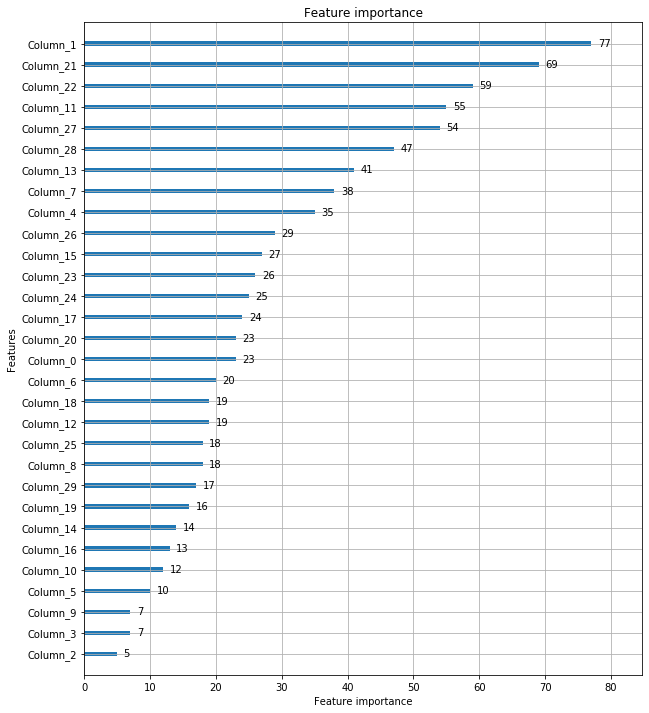

In [21]:
from lightgbm import plot_importance 
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12)) 
plot_importance(lgbm,ax=ax)

Unlike the XGBoost, column1 (mean radius) seems to be the most important feature. 

### Conclusion 
The soft voting classifier, Random Forest, XGBoost and LightGBM all perform well with over 90% accuracy and very high recall, precision and thus F1 scores. Overall, even without much hyperparameter tuning, the ensemble models are quite effective at classification. 

However, the Wisconsin Breast cancer dataset is pretty small, so perhaps comparing the performance on this small dataset is not too meaningful. 